<a href="https://colab.research.google.com/github/HibaIbrahimi/Satellite_imagery_segmentation/blob/main/Satellite_imagery_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1 : Data Processing


In [1]:
!pip install patchify

In [2]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler , StandardScaler

from matplotlib import pyplot as plt
import random

In [3]:
minmaxscaler = MinMaxScaler()

In [4]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset'

total 33K
-rw------- 1 root root  548 Mar  6 21:59  classes.json
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 1'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 2'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 3'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 4'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 5'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 6'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 7'
drwx------ 4 root root 4.0K Mar  6 22:06 'Tile 8'


In [5]:
dataset_root_folder ='/content/drive/MyDrive/Colab Notebooks/Datasets'

In [6]:
dataset_name = 'Satellite_Imagery_dataset'

In [7]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'images':
    images = os.listdir(path)
    print(images)
    for i , image_name in enumerate (images):
      if (image_name.endswith('.jpg')):
       print(image_name)

['image_part_007.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_009.jpg', 'image_part_008.jpg', 'image_part_001.jpg', 'image_part_002.jpg', 'image_part_005.jpg', 'image_part_006.jpg']
image_part_007.jpg
image_part_003.jpg
image_part_004.jpg
image_part_009.jpg
image_part_008.jpg
image_part_001.jpg
image_part_002.jpg
image_part_005.jpg
image_part_006.jpg
['image_part_007.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_006.jpg', 'image_part_009.jpg', 'image_part_005.jpg', 'image_part_001.jpg', 'image_part_008.jpg']
image_part_007.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_006.jpg
image_part_009.jpg
image_part_005.jpg
image_part_001.jpg
image_part_008.jpg
['image_part_007.jpg', 'image_part_002.jpg', 'image_part_001.jpg', 'image_part_009.jpg', 'image_part_008.jpg', 'image_part_004.jpg', 'image_part_006.jpg', 'image_part_003.jpg', 'image_part_005.jpg']
image_part_007.jpg
image_part_002.jpg
image_part_001.jpg
imag

In [8]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks':
    images = os.listdir(path)
    print(path)
    #print(images)
    for i , image_name in enumerate (images):
      if (image_name.endswith('.png')):
       #print(image_name)
       a = True

/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 5/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 1/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 2/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 3/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 7/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 8/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 6/masks
/content/drive/MyDrive/Colab Notebooks/Datasets/Satellite_Imagery_dataset/Tile 4/masks


In [9]:
image_patch_size= 256

In [10]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [11]:
image.shape

(544, 509, 3)

In [12]:
image_paches= patchify(image,(image_patch_size,image_patch_size,3), step=image_patch_size)

In [13]:
len(image_paches)

2

In [14]:
print(image_paches.shape)

(2, 1, 1, 256, 256, 3)


In [15]:
#minmaxscaler
image_x = image_paches[0,0,:,:]
minmaxscaler = MinMaxScaler()
image_y = minmaxscaler.fit_transform(image_x.reshape(-1,image_x.shape[-1])).reshape(image_x.shape)

In [16]:
image_y[0].shape

(256, 256, 3)

In [17]:
print(type(image))

<class 'numpy.ndarray'>


In [18]:
type(Image.fromarray(image))

PIL.Image.Image

array([[[ 57,  72,  81],
        [ 50,  65,  74],
        [ 72,  84,  94],
        ...,
        [ 77,  85, 115],
        [ 77,  86, 124],
        [ 76,  87, 131]],

       [[ 53,  67,  79],
        [ 60,  75,  84],
        [ 82,  94, 106],
        ...,
        [ 83,  88, 119],
        [ 76,  85, 123],
        [ 69,  80, 124]],

       [[ 67,  78,  92],
        [101, 113, 125],
        [107, 116, 130],
        ...,
        [ 86,  91, 122],
        [ 84,  91, 130],
        [ 79,  88, 132]],

       ...,

       [[111, 107, 102],
        [102,  98,  93],
        [ 85,  81,  76],
        ...,
        [ 97,  91,  96],
        [105, 101, 106],
        [121, 120, 122]],

       [[127, 124, 119],
        [141, 138, 133],
        [135, 133, 125],
        ...,
        [ 99,  93,  98],
        [109, 105, 110],
        [105, 104, 106]],

       [[163, 163, 157],
        [178, 178, 172],
        [159, 157, 149],
        ...,
        [101,  95, 100],
        [111, 107, 112],
        [ 97,  94,  96]]], dtype=uint8)
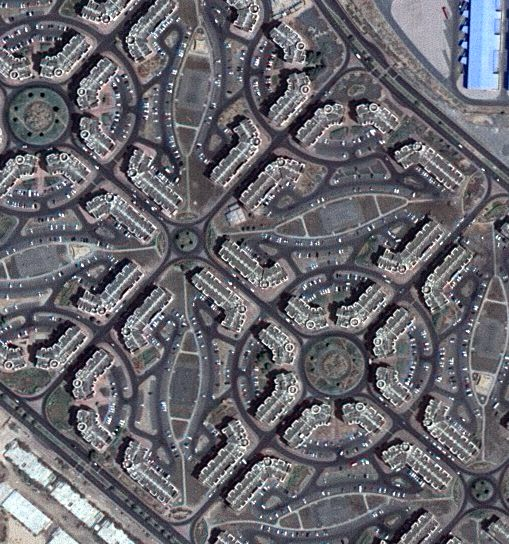

In [19]:
image

In [20]:
image.shape

(544, 509, 3)

In [21]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [22]:
image_dataset = []
mask_dataset = []


for image_type in ['images','masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
    image_extension = 'png'
  for tile_id in range (1,8):
    for image_id in range (1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':      #change mask images from rgb tp bgr
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0,size_x,size_y))
        #print("{}, {}".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image,(image_patch_size,image_patch_size,3), step=image_patch_size)
        #print(len(patched_images))
        for i in range (patched_images.shape[0]):
          for j in range (patched_images.shape[1]):

            if image_type == 'images':

              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1,individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image =  individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)

            elif image_type == 'masks':

              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)




In [23]:
print(len(image_dataset))
print(len(mask_dataset))


945
945


In [24]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [25]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [26]:
type(image_dataset[0])

numpy.ndarray

In [27]:
type(np.reshape(image_dataset[0],(image_patch_size,image_patch_size,3)))

numpy.ndarray

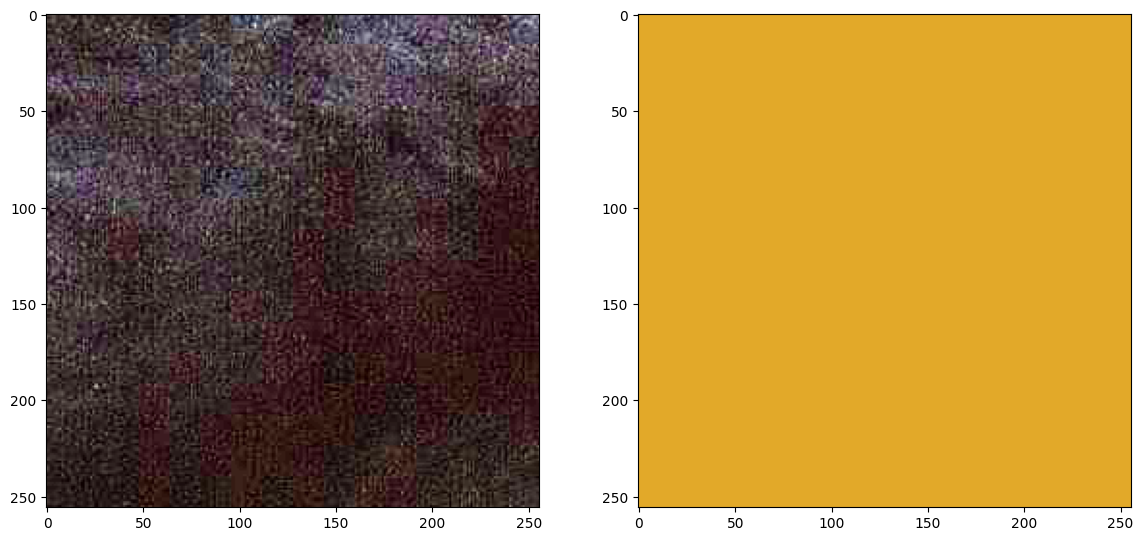

In [28]:
random_image_id = random.randint(0,len(image_dataset))

plt.figure(figsize = (14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

next step , we gonna process the labels :
it's abt applying one hot encoding with labels hex image type to set RGB/label

In [29]:

class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [30]:
mask_dataset.shape

(945, 256, 256, 3)

In [31]:
#make sure that the label is equal to his patsch mask
label = individual_patched_mask

In [32]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape , dtype=np.uint8 )

  label_segment[np.all(label == class_water, axis= -1)] = 0
  label_segment[np.all(label == class_land, axis= -1)] = 1
  label_segment[np.all(label == class_road, axis= -1)] = 2
  label_segment[np.all(label == class_building, axis= -1)] = 3
  label_segment[np.all(label == class_vegetation, axis= -1)] = 4
  label_segment[np.all(label == class_unlabeled, axis= -1)] = 5

  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)

  return label_segment

In [33]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)


In [34]:
print(len(labels))

945


In [35]:
labels = np.array(labels)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
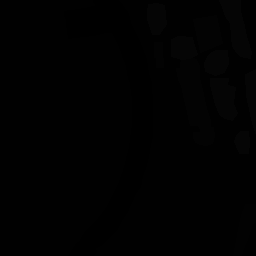

In [36]:
labels[0]

In [37]:
labels = np.expand_dims(labels,axis = 3)

In [38]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [39]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [40]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


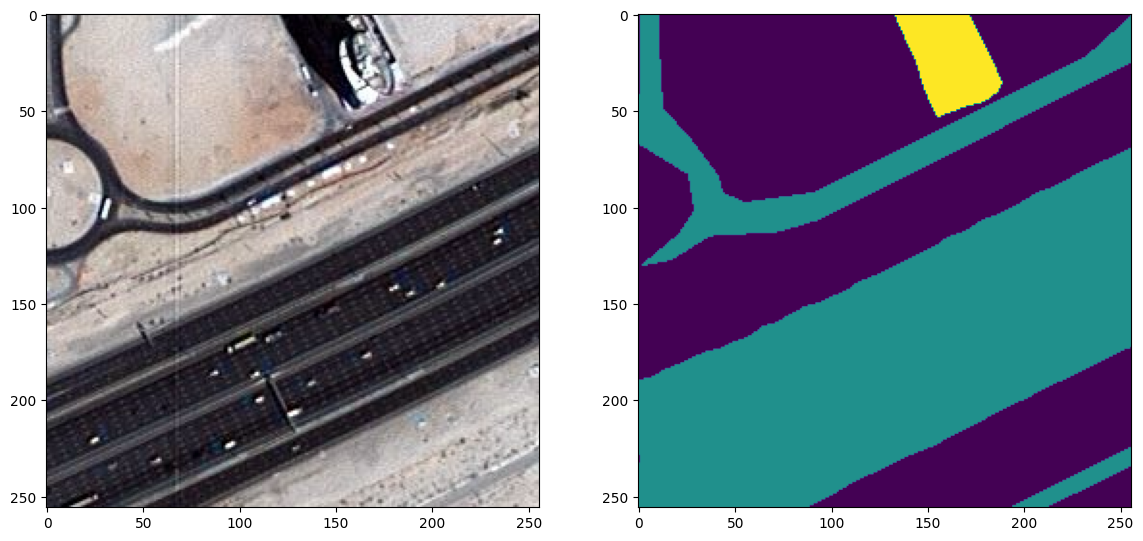

In [41]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
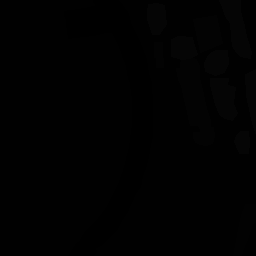

In [42]:
#what has been used in order to process the image below
labels[0][:,:,0]

at this point , we have the final dataset , our dataset that we need to train and test

In [43]:
#
total_classes = len(np.unique(labels))

In [44]:
total_classes

6

In [45]:
from tensorflow.keras.utils import to_categorical

In [46]:
labels_categorical_dataset = to_categorical(labels,num_classes = total_classes)

In [47]:
labels_categorical_dataset

array([[[[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        ...,

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0.

In [48]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [49]:
master_training_dataset = image_dataset

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset,test_size=0.15, random_state=100)

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [53]:
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]
total_classes = y_train.shape[3]

In [54]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


Part 2: Deep Learning with Satellite Imagery Data

In [55]:
!pip install -U segmentation-models

In [56]:
from keras.models import Model
from keras.layers import Input,Conv2D , MaxPooling2D , UpSampling2D ,Conv2DTranspose
from keras.layers import concatenate , BatchNormalization, Dropout , Lambda

In [57]:
from keras import backend as K

In [58]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value


In [59]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)


  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [60]:
metrics = ["accuracy", jaccard_coef]

In [61]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [62]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [63]:
model = get_deep_learning_model()

In [64]:
model.get_config()

{'name': 'model',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': N

## Generating Loss Function

- dice loss > Focal Loss > Total Loss
- Total Loss = (Dice loss + (1*Focal Loss))

In [65]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [66]:
import keras
print(keras.__version__)

2.15.0


In [67]:
#a life saver , problem dyal les version hada bach t7el
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [68]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [69]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [70]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [71]:
total_loss = dice_loss + (1 * focal_loss)

## Model compilation

In [72]:
import tensorflow as tf

In [73]:
tf.keras.backend.clear_session()

In [74]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [75]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

##model training
##model visualisation

In [76]:
!pip install keras


In [77]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model


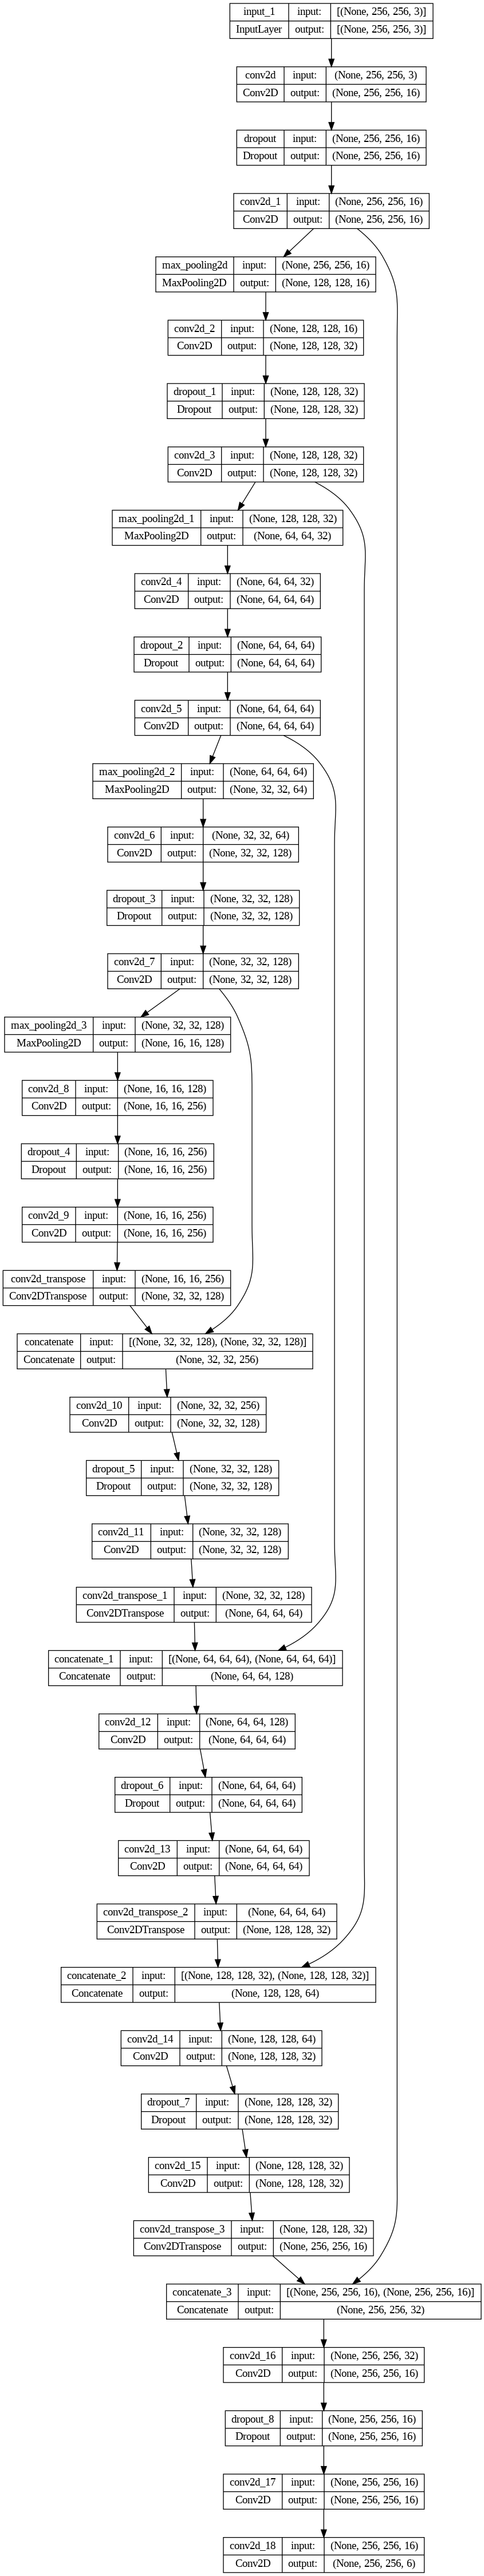

In [78]:
plot_model(model, to_file="satellite_model_plot.png", show_shapes=True, show_layer_names=True)


In [79]:

import keras
from IPython.display import clear_output

%matplotlib inline

In [80]:
class PlotLoss(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.jaccard_coef = []
    self.val_jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)
    # self.losses.append(logs.get('loss'))
    # self.val_losses.append(logs.get('val_loss'))

    self.jaccard_coef.append(logs.get('jaccard_coef'))
    self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

    self.i += 1

    clear_output(wait=True)
    # plt.plot(self.x, self.losses, label="loss")
    # plt.plot(self.x, self.val_losses, label="val_loss")

    plt.plot(self.x, self.jaccard_coef, label="jaccard_coef")
    plt.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")

    plt.legend()
    plt.show();

plot_loss = PlotLoss()

In [81]:
class PlotLossEx(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []

    self.losses = []
    self.val_losses = []

    self.jaccard_coef = []
    self.val_jaccard_coef = []

    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)

    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    self.jaccard_coef.append(logs.get('jaccard_coef'))
    self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

    self.i += 1

    plt.figure(figsize=(14,8))
    f, (graph1, graph2) = plt.subplots(1,2, sharex=True)

    clear_output(wait=True)

    graph1.set_yscale('log')
    graph1.plot(self.x, self.losses, label="loss")
    graph1.plot(self.x, self.val_losses, label="val_loss")
    graph1.legend()

    graph2.set_yscale('log')
    graph2.plot(self.x, self.jaccard_coef, label="jaccard_coef")
    graph2.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")
    graph2.legend()

    plt.show();

plot_loss = PlotLossEx()


the wantdb part first

In [82]:
pip install wandb

In [83]:
!pip show wandb

Name: wandb
Version: 0.16.6
Summary: A CLI and library for interacting with the Weights & Biases API.
Home-page: 
Author: 
Author-email: Weights & Biases <support@wandb.com>
License: MIT License
        
        Copyright (c) 2021 Weights and Biases, Inc.
        
        Permission is hereby granted, free of charge, to any person obtaining a copy
        of this software and associated documentation files (the "Software"), to deal
        in the Software without restriction, including without limitation the rights
        to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
        copies of the Software, and to permit persons to whom the Software is
        furnished to do so, subject to the following conditions:
        
        The above copyright notice and this permission notice shall be included in all
        copies or substantial portions of the Software.
        
        THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
        IM

In [84]:
!wandb login

wandb: Currently logged in as: ibrahimih-hiba (hiba-project). Use `wandb login --relogin` to force relogin


In [85]:
import wandb
from wandb.keras import WandbCallback


In [86]:
wandb.init(project="satellite-imagery-segmentation", entity="hiba-project")

wandb: Currently logged in as: ibrahimih-hiba (hiba-project). Use `wandb login --relogin` to force relogin


In [87]:
!wandb login --relogin


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [88]:
!wandb

Usage: wandb [OPTIONS] COMMAND [ARGS]...

Options:
  --version  Show the version and exit.
  --help     Show this message and exit.

Commands:
  agent         Run the W&B agent
  artifact      Commands for interacting with artifacts
  beta          Beta versions of wandb CLI commands.
  controller    Run the W&B local sweep controller
  disabled      Disable W&B.
  docker        Run your code in a docker container.
  docker-run    Wrap `docker run` and adds WANDB_API_KEY and WANDB_DOCKER...
  enabled       Enable W&B.
  init          Configure a directory with Weights & Biases
  job           Commands for managing and viewing W&B jobs
  launch        Launch or queue a W&B Job.
  launch-agent  Run a W&B launch agent.
  launch-sweep  Run a W&B launch sweep (Experimental).
  login         Login to Weights & Biases
  offline       Disable W&B sync
  online        Enable W&B sync
  pull          Pull files from Weights & Biases
  restore       Restore code, config and docker state for a run

In [89]:
!wandb status

Current Settings
{
  "_extra_http_headers": null,
  "_proxies": null,
  "api_key": null,
  "base_url": "https://api.wandb.ai",
  "entity": null,
  "git_remote": "origin",
  "ignore_globs": [],
  "project": null,
  "root_dir": null,
  "section": "default"
}


In [90]:
model_history = model.fit(x_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[WandbCallback()],
                          shuffle=False)

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/10
 6/51 [==>...........................] - ETA: 8s - loss: 1.0555 - accuracy: 0.1076 - jaccard_coef: 0.0693

51/51 [==============================] - ETA: 0s - loss: 1.0139 - accuracy: 0.4649 - jaccard_coef: 0.2081

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240507_135004-v7ac84q9/files/model-best)... Done. 2.0s


51/51 [==============================] - 50s 526ms/step - loss: 1.0139 - accuracy: 0.4649 - jaccard_coef: 0.2081 - val_loss: 0.9931 - val_accuracy: 0.5460 - val_jaccard_coef: 0.3257
Epoch 2/10
50/51 [============================>.] - ETA: 0s - loss: 0.9910 - accuracy: 0.6394 - jaccard_coef: 0.3352

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240507_135004-v7ac84q9/files/model-best)... Done. 0.7s


51/51 [==============================] - 16s 321ms/step - loss: 0.9909 - accuracy: 0.6397 - jaccard_coef: 0.3370 - val_loss: 0.9792 - val_accuracy: 0.6985 - val_jaccard_coef: 0.3785
Epoch 3/10
50/51 [============================>.] - ETA: 0s - loss: 0.9715 - accuracy: 0.6929 - jaccard_coef: 0.4251

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240507_135004-v7ac84q9/files/model-best)... Done. 4.5s


51/51 [==============================] - 21s 413ms/step - loss: 0.9714 - accuracy: 0.6934 - jaccard_coef: 0.4273 - val_loss: 0.9636 - val_accuracy: 0.7157 - val_jaccard_coef: 0.4543
Epoch 4/10
51/51 [==============================] - ETA: 0s - loss: 0.9627 - accuracy: 0.7140 - jaccard_coef: 0.4677

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240507_135004-v7ac84q9/files/model-best)... Done. 1.8s


51/51 [==============================] - 18s 356ms/step - loss: 0.9627 - accuracy: 0.7140 - jaccard_coef: 0.4677 - val_loss: 0.9596 - val_accuracy: 0.7243 - val_jaccard_coef: 0.4610
Epoch 5/10
51/51 [==============================] - ETA: 0s - loss: 0.9595 - accuracy: 0.7223 - jaccard_coef: 0.4780

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240507_135004-v7ac84q9/files/model-best)... Done. 4.2s


51/51 [==============================] - 21s 410ms/step - loss: 0.9595 - accuracy: 0.7223 - jaccard_coef: 0.4780 - val_loss: 0.9580 - val_accuracy: 0.7305 - val_jaccard_coef: 0.4673
Epoch 6/10
51/51 [==============================] - ETA: 0s - loss: 0.9553 - accuracy: 0.7361 - jaccard_coef: 0.4966

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240507_135004-v7ac84q9/files/model-best)... Done. 5.1s


51/51 [==============================] - 21s 424ms/step - loss: 0.9553 - accuracy: 0.7361 - jaccard_coef: 0.4966 - val_loss: 0.9561 - val_accuracy: 0.7357 - val_jaccard_coef: 0.4825
Epoch 7/10
50/51 [============================>.] - ETA: 0s - loss: 0.9508 - accuracy: 0.7488 - jaccard_coef: 0.5070

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240507_135004-v7ac84q9/files/model-best)... Done. 3.0s


51/51 [==============================] - 23s 445ms/step - loss: 0.9508 - accuracy: 0.7492 - jaccard_coef: 0.5082 - val_loss: 0.9552 - val_accuracy: 0.7318 - val_jaccard_coef: 0.4767
Epoch 8/10
51/51 [==============================] - 11s 208ms/step - loss: 0.9470 - accuracy: 0.7602 - jaccard_coef: 0.5279 - val_loss: 0.9564 - val_accuracy: 0.7340 - val_jaccard_coef: 0.4995
Epoch 9/10
51/51 [==============================] - ETA: 0s - loss: 0.9414 - accuracy: 0.7759 - jaccard_coef: 0.5570

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240507_135004-v7ac84q9/files/model-best)... Done. 2.5s


51/51 [==============================] - 21s 423ms/step - loss: 0.9414 - accuracy: 0.7759 - jaccard_coef: 0.5570 - val_loss: 0.9505 - val_accuracy: 0.7567 - val_jaccard_coef: 0.5385
Epoch 10/10
50/51 [============================>.] - ETA: 0s - loss: 0.9357 - accuracy: 0.7939 - jaccard_coef: 0.5867

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240507_135004-v7ac84q9/files/model-best)... Done. 2.8s


51/51 [==============================] - 23s 447ms/step - loss: 0.9357 - accuracy: 0.7943 - jaccard_coef: 0.5891 - val_loss: 0.9504 - val_accuracy: 0.7567 - val_jaccard_coef: 0.5582


In [116]:
# Specify the file path
file_path = r"/content/satellite_segmentation_ended.h5"

# Check if the file exists
if os.path.isfile(file_path):
    # Save your model explicitly
    artifact = wandb.Artifact("model", type="model")
    artifact.add_file(file_path)
    wandb.log_artifact(artifact)
    wandb.finish()
else:
    print("File not found:", file_path)


accuracy,▁▅▆▆▆▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
jaccard_coef,▁▃▅▆▆▆▇▇▇█
loss,█▆▄▃▃▃▂▂▂▁
val_accuracy,▁▆▇▇▇▇▇▇██
val_jaccard_coef,▁▃▅▅▅▆▆▆▇█
val_loss,█▆▃▃▂▂▂▂▁▁
accuracy,0.79431
best_epoch,9
best_val_loss,0.95039
epoch,9


In [91]:
#khedemna b hadi f lwl
#model_history = model.fit(x_train, y_train,
 #                           batch_size=16,
  #                          verbose=1,
   #                         epochs=10,
    #                        validation_data=(x_test, y_test),
     #                       #callbacks=[plot_loss],
 #                           shuffle=False)

In [92]:
history_a = model_history

In [93]:
history_a.history

{'loss': [1.0139319896697998,
  0.9909408688545227,
  0.971443772315979,
  0.9626598358154297,
  0.9595333337783813,
  0.9552926421165466,
  0.9508023858070374,
  0.947028636932373,
  0.9414291381835938,
  0.9356929659843445],
 'accuracy': [0.4649094343185425,
  0.6397427916526794,
  0.6933985352516174,
  0.7139589786529541,
  0.7222731709480286,
  0.7360602021217346,
  0.7492146492004395,
  0.7602160573005676,
  0.7759265899658203,
  0.7943140864372253],
 'jaccard_coef': [0.20805279910564423,
  0.33698561787605286,
  0.42729684710502625,
  0.46769142150878906,
  0.47797131538391113,
  0.4965647757053375,
  0.5082398056983948,
  0.527866780757904,
  0.5569631457328796,
  0.5891311764717102],
 'val_loss': [0.9931083917617798,
  0.9792219400405884,
  0.9636170268058777,
  0.9596068859100342,
  0.9580075740814209,
  0.9561198353767395,
  0.955244243144989,
  0.9563563466072083,
  0.9505355358123779,
  0.9503861665725708],
 'val_accuracy': [0.5459688305854797,
  0.6985371708869934,
  0.715

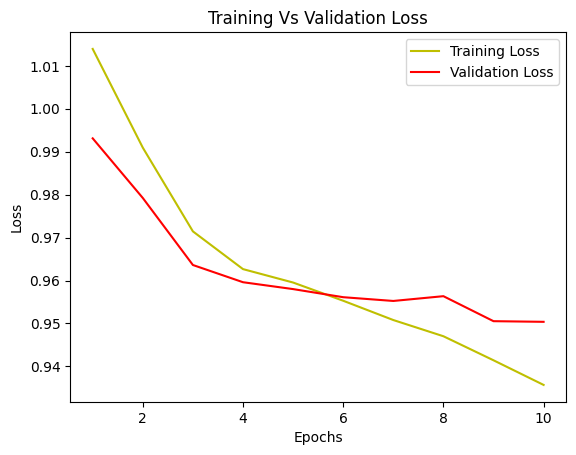

In [94]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [95]:
loss

[1.0139319896697998,
 0.9909408688545227,
 0.971443772315979,
 0.9626598358154297,
 0.9595333337783813,
 0.9552926421165466,
 0.9508023858070374,
 0.947028636932373,
 0.9414291381835938,
 0.9356929659843445]

In [96]:
val_loss

[0.9931083917617798,
 0.9792219400405884,
 0.9636170268058777,
 0.9596068859100342,
 0.9580075740814209,
 0.9561198353767395,
 0.955244243144989,
 0.9563563466072083,
 0.9505355358123779,
 0.9503861665725708]

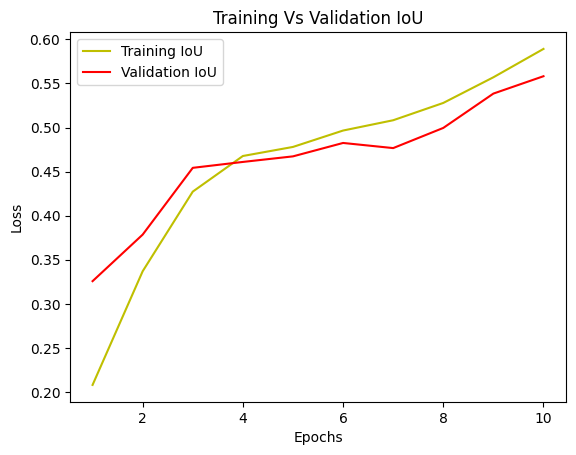

In [97]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [98]:
model_history.params

{'verbose': 1, 'epochs': 10, 'steps': 51}

In [99]:
y_pred = model.predict(x_test)

5/5 [==============================] - 5s 54ms/step


In [100]:
len(y_pred)

142

In [101]:
y_pred

array([[[[8.94201323e-02, 3.53371471e-01, 2.02571437e-01,
          1.39443383e-01, 1.40940338e-01, 7.42532387e-02],
         [6.24501631e-02, 3.93005192e-01, 2.08825871e-01,
          1.48817569e-01, 1.39091447e-01, 4.78097349e-02],
         [5.41285761e-02, 3.37283850e-01, 2.51117676e-01,
          1.61803082e-01, 1.59994468e-01, 3.56724449e-02],
         ...,
         [1.30710900e-01, 2.03283086e-01, 3.33127946e-01,
          5.01325279e-02, 2.64186203e-01, 1.85594056e-02],
         [1.17847122e-01, 1.74587175e-01, 4.04360265e-01,
          5.97295687e-02, 2.24773079e-01, 1.87028218e-02],
         [1.58284307e-01, 1.68641418e-01, 3.28503758e-01,
          6.94144070e-02, 2.40061194e-01, 3.50949354e-02]],

        [[5.32993712e-02, 4.19336230e-01, 2.11933926e-01,
          1.51383594e-01, 1.24310851e-01, 3.97359505e-02],
         [2.47568358e-02, 5.20467699e-01, 1.87609091e-01,
          1.44848436e-01, 1.07924856e-01, 1.43930428e-02],
         [1.77947059e-02, 5.19559801e-01, 2.1689

In [102]:
y_pred_argmax = np.argmax(y_pred , axis = 3)

In [103]:
y_pred_argmax

array([[[1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 4, 2, 2],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 2, 2, ..., 2, 2, 2],
        [0, 2, 2, ..., 2, 2, 2],
        [1, 2, 2, ..., 2, 2, 2],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]],

       ...,

       [[2, 1, 2, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [104]:
y_test_argmax = np.argmax(y_test, axis=3)

In [105]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

##Comparing prediction result that we had
on va utiliser test images

In [106]:
import random

In [107]:
test_image_number = random.randint(0, len(x_test))

test_image = x_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 2s 2s/step


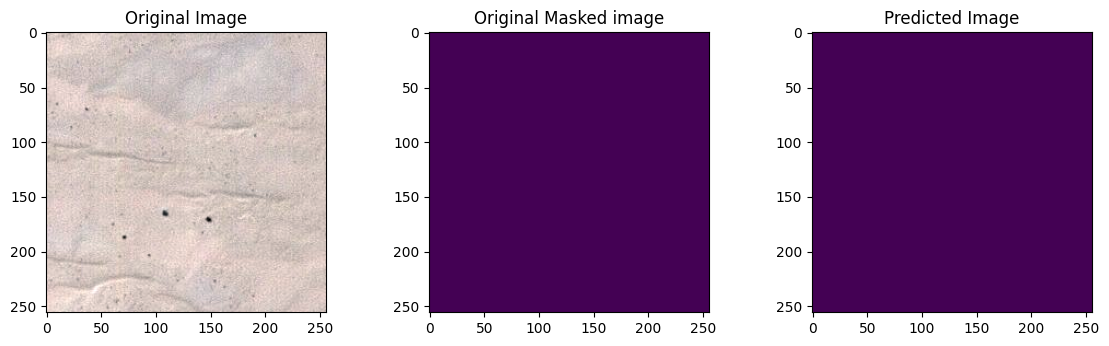

In [108]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [109]:
model.save("satellite_segmentation_ended.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [110]:
!ls -lah

total 23M
drwxr-xr-x 1 root root 4.0K May  7 13:30 .
drwxr-xr-x 1 root root 4.0K May  7 12:37 ..
drwxr-xr-x 4 root root 4.0K May  3 13:20 .config
drwx------ 5 root root 4.0K May  7 12:40 drive
drwxr-xr-x 1 root root 4.0K May  3 13:20 sample_data
-rw-r--r-- 1 root root 352K May  7 13:49 satellite_model_plot.png
-rw-r--r-- 1 root root  23M May  7 13:59 satellite_segmentation_ended.h5
drwxr-xr-x 6 root root 4.0K May  7 13:50 wandb


In [111]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              